## Analyze an image with Computer Vision API using Python 

In [1]:
import os
os.chdir('../')
import time
import requests
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

from PIL import Image
from io import BytesIO

In [14]:
subscription_key = 'd79fe8e294c34578b86dc252b71bb3a6'
vision_base_url = 'https://northeurope.api.cognitive.microsoft.com/vision/v2.0/'
vision_analyze_url = vision_base_url + 'analyze'

headers  = {'Ocp-Apim-Subscription-Key': subscription_key,
           'Content-Type': 'application/octet-stream'}

image_path = 'labels_images/5216-2012222-midfield-basadone.jpg-resize_then_crop-_frame_bg_color_FFF-preserve_ratio_true-gravity_center-w_720-h_480_.jpg'
image_data = open(image_path, "rb").read()

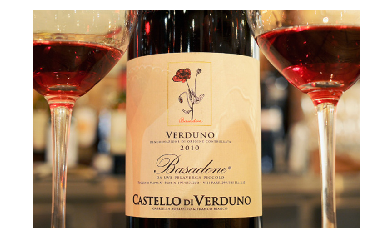

In [15]:
image = plt.imread(image_path)
plt.axis('off')
plt.imshow(image)

In [16]:
params   = {'visualFeatures': 'Tags, Description'}
response = requests.post(vision_analyze_url, headers=headers, params=params, data=image_data)
response.raise_for_status()
analysis = response.json()

In [17]:
image_caption = analysis["description"]["captions"][0]["text"].capitalize()
print(image_caption)

A close up of a bottle and a glass of red wine


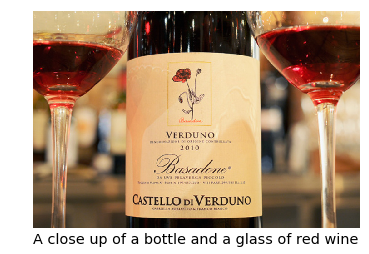

In [18]:
image = plt.imread(image_path)
plt.axis("off")
plt.title(image_caption, size="x-large", y=-0.1)
plt.imshow(image)
plt.savefig('labels_images_results/example_description.jpg')

## Get a thumbnail with Computer Vision API

In [19]:
thumbnail_url = vision_base_url + "generateThumbnail"

In [20]:
params   = {'width': '100', 'height': '100','smartCropping': 'true'}
response = requests.post(thumbnail_url, headers=headers, params=params, data=image_data)
response.raise_for_status()

In [21]:
thumbnail = Image.open(BytesIO(response.content))
thumbnail.save('labels_images_results/example_thumbnail.jpg')

## Text recognition with Computer Vision API

In [22]:
text_recognition_url = vision_base_url + 'RecognizeText'
params   = {'mode' : 'Printed'}
response = requests.post(text_recognition_url, headers=headers, params=params, data=image_data)
response.raise_for_status()

In [23]:
analysis = {}
while not "recognitionResult" in analysis:
    response_final = requests.get(response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    time.sleep(1)
polygons = [(line["boundingBox"], line["text"]) for line in analysis["recognitionResult"]["lines"]]
words = [line["text"] for line in analysis["recognitionResult"]["lines"]]

In [45]:
words

['VERDUNO',
 'DINOMINAZIONE DI ORIGINE CONTROLEATA',
 '2010',
 'Basadone',
 'DA UVE PELAVERGA PICCOLO',
 'OCHO EI MATT X - PART. N. 197/137/200 . VIII PART. 299/345 HA 213',
 'CASTELLO DI VERDUNO',
 'GABRIELLA SURLOTTO & FRANCO BLANCO']

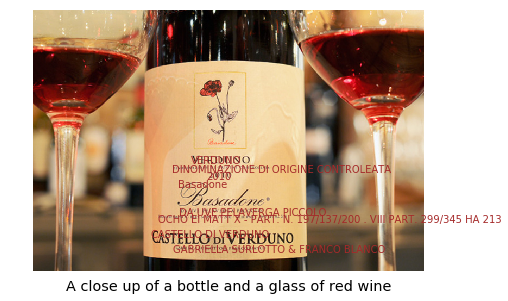

In [46]:
plt.figure(figsize=(7, 8))

image  = plt.imread(image_path)
ax     = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1]) for i in range(0,len(polygon[0]),2)]
    text     = polygon[1]
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=10, va='top', color='brown')
plt.axis("off")
plt.title(image_caption, size="x-large", y=-0.1)
plt.savefig('labels_images_results/example_ocr.jpg', dpi=200, bbox_inches='tight')
plt.show()